In [1]:
import pandas as pd

In [2]:
trainFile='train_sequences.txt'

df=pd.read_csv(trainFile,delimiter='\t')

Appears that the head and tail sequences are mostly same for this dataset, we can remove these sequences that are uninformative,

In [3]:
df.columns=['Sequence','Exp']

In [4]:
sequenceList=list(df['Sequence'])

In [5]:
headSet=set()
for sequence in sequenceList:
    headSet.add(sequence[:18])

print(len(headSet))
print(len(headSet)/(len(df)))


5
7.419215501055977e-07


In [6]:
tailSet=set()
for sequence in sequenceList:
    tailSet.add(sequence[-15:])

In [7]:
print(len(tailSet))
print(len(tailSet)/(len(df)))

25
3.7096077505279886e-06


In [18]:
df.head()

,Sequence,Exp
0,TGCATTTTTTTCACATCTATGTTGCGTTAGAACGATATTGGAACAC...,6.0
1,TGCATTTTTTTCACATCTGTGAAGAATATCAGCTTTCAATCGTATT...,8.0
2,TGCATTTTTTTCACATCAATCCGAGATATCTGTTGATAAACTTACC...,9.0
3,TGCATTTTTTTCACATCAAGTTATCTGGTGTACGTTTTCTCGTATA...,12.0
4,TGCATTTTTTTCACATCCGACTACTGCATTTTGATCTTATAGATAA...,11.0


Now we check if there are duplicates of sequences in the training file, it appears there is no duplicate

<AxesSubplot:ylabel='Frequency'>

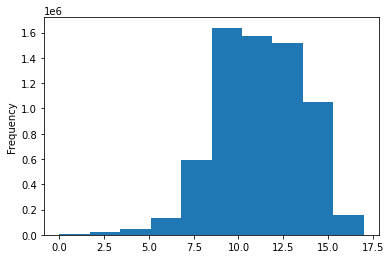

In [10]:
df.to_csv("train_.csv")

In [11]:
df['GC_ratio']=[(seq.count('G')+seq.count('C'))/len(seq)  for seq in df['raw_seq']]

KeyError: 'raw_seq'

<AxesSubplot:ylabel='Frequency'>

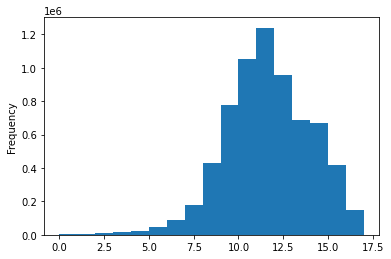

In [25]:
df['Exp']=round(df['Exp'])
df['Exp'].plot.hist(bins=17)



In [23]:
df['Exp']

0           6.000000
1           8.000000
2           9.000000
3          12.000000
4          11.000000
             ...    
6739252    11.000000
6739253    14.000000
6739254     5.223988
6739255    12.000000
6739256    10.463105
Name: Exp, Length: 6739257, dtype: float64

In [26]:
print(len(set(df['Exp'])))

18


In [ ]:
from scipy import stats
print(stats.spearmanr(df['GC_ratio'],df['Exp']))

print(stats.pearsonr(df['GC_ratio'],df['Exp']))